### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
# Importa a biblioteca ADS (Accelerated Data Science).
import ads

In [2]:
# Verifica a versão instalada.
ads.__version__

'2.8.9'

In [3]:
# Importa o DatasetFactory para permitir que seja criado um dataset ADS.
from ads.dataset.factory import DatasetFactory

In [4]:
# Cria um dataset ADS com o arquivo CSV.
ds_tratado = DatasetFactory.open('doenca_cardiaca_final.csv')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
# Mostra um resumo do dataset, com os 5 primeiros, total de linhas e colunas.
ds_tratado

sexo,idade,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,fumante,risco_DAC_decada
1,39,0,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0,0
0,46,0,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0,0
1,48,20,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,2,0
0,61,30,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,3,1
0,46,23,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,3,0


6,954 rows, 15 columns

In [6]:
# Mostra o tipo de dado informado como parâmetro.
type(ds_tratado)

ads.dataset.dataset.ADSDataset

In [7]:
# Define a variável dependente.
ds_tratado = ds_tratado.set_target('risco_DAC_decada')

In [8]:
# Mostra o tipo de dado informado como parâmetro.
type(ds_tratado)

ads.dataset.classification_dataset.BinaryClassificationDataset

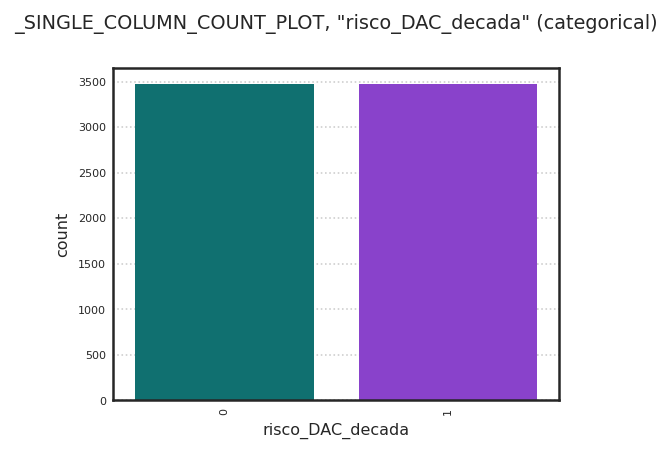

In [9]:
# Visualiza a variável alvo.
ds_tratado.target.show_in_notebook()

# Preparando os dados para gerar modelos

In [10]:
# Importa a biblioteca Numpy.
import numpy as np

In [11]:
# Define um seed fixo para todos as funções e ferramentas que utilizem o random do Numpy para gerar números números aleatórios
np.random.seed(42)

In [12]:
# Separa o dataset entre traino e teste.
train, test = ds_tratado.train_test_split(random_state=42)

In [13]:
# Exibe o números de registros e colunas da variável X (independentes) e y (dependente) seperadas para traino.
train

Train Data
Shape of X:(6258, 14)
Shape of y:(6258,)

In [14]:
# Exibe o dataframe com as variáveis de X para treino.
train.X

,sexo,idade,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,fumante
4782,1,49,20,0.0,0,1,0,193.0,172.0,105.0,19.70,90.0,77.0,2
208,0,43,0,0.0,0,0,0,263.0,115.0,82.5,25.91,105.0,81.8,0
1373,1,42,20,0.0,0,0,0,231.0,123.0,87.0,21.48,75.0,44.0,2
6816,1,52,25,0.0,0,1,0,206.0,173.0,117.0,29.63,75.0,77.0,3
3357,1,45,20,0.0,0,0,0,200.0,113.0,75.5,21.51,88.0,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,43,20,0.0,0,0,0,184.0,127.5,81.0,28.31,108.0,75.0,2
5191,1,52,20,0.0,0,0,0,225.0,126.0,75.0,22.18,85.0,100.0,2
5226,0,60,0,0.0,0,1,0,334.0,132.0,94.0,25.38,80.0,98.0,0
5390,1,54,43,0.0,0,0,0,243.0,135.0,92.0,31.30,90.0,65.0,3


In [15]:
# Exibe o números de registros e colunas da variável X (independentes) e y (dependente) seperadas para teste.
test

Test Data
Shape of X:(696, 14)
Shape of y:(696,)

In [16]:
# Exibe o dataframe com as variáveis de X para teste.
test.X

,sexo,idade,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,fumante
5487,1,61,15,0.0,0,0,0,204.0,120.0,80.0,25.71,80.0,83.0,2
5489,0,50,0,0.0,0,1,0,236.0,152.0,92.0,24.47,120.0,67.0,0
2133,1,42,20,0.0,0,0,0,182.0,120.0,83.0,27.26,85.0,87.0,2
37,1,52,0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
2063,1,42,0,0.0,0,0,0,258.0,110.0,69.0,26.25,60.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,1,62,0,0.0,0,1,0,208.0,144.0,80.0,31.42,75.0,66.0,0
5465,1,67,15,0.0,1,1,0,285.0,155.0,90.0,30.42,70.0,77.0,2
2509,0,57,0,0.0,0,1,0,382.0,133.0,77.0,24.27,75.0,81.0,0
6261,1,56,20,0.0,0,1,0,205.0,210.0,130.0,25.49,95.0,127.0,2


# Modelo DecisionTreeClassifier

In [17]:
# Importar as ferramentas estimadora de árvare de decisão da biblioteca scikit-learn.
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Cria um modelo de classifiação de árvore de decisão.
classificador_simples = DecisionTreeClassifier()

In [19]:
# Utiliza o método fit() para treinar o modelo com os dados de traino passados como parâmetro.
classificador_simples.fit(train.X, train.y)

DecisionTreeClassifier()

In [20]:
# Calcula a acurácia do modelo.
classificador_simples.score(test.X, test.y)

0.8979885057471264

In [21]:
# Importar as ferramentas de matriz de confusão da biblioteca scikit-learn.
from sklearn.metrics import ConfusionMatrixDisplay

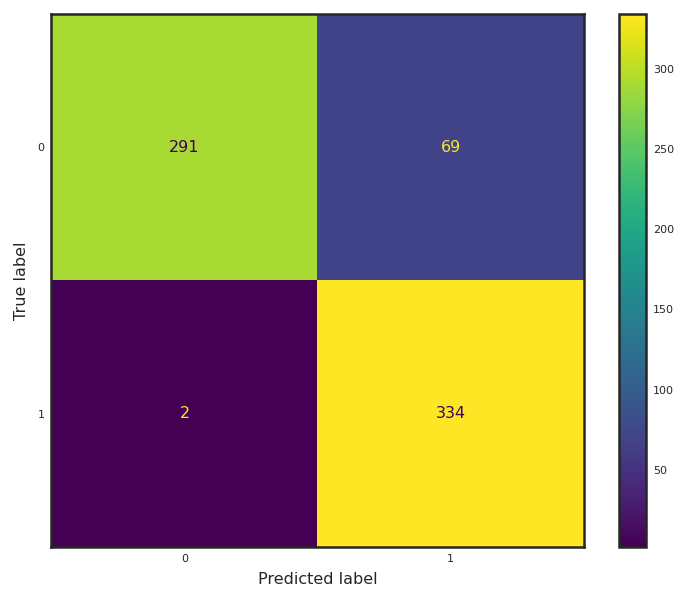

In [22]:
# Cria uma matriz com eixo de valores reais vs. previsões.
# Recebe como parâmetro o modelo e os dados de teste.
ConfusionMatrixDisplay.from_estimator(classificador_simples, test.X, test.y)

# Modelo DecisionTreeClassifier - Melhorando com Hiperparâmetro

In [23]:
# Cria um modelo de classifiação de árvore de decisão.
classificador_profundo = DecisionTreeClassifier(max_depth=100)

In [24]:
# Utiliza o método fit() para treinar o modelo com os dados de traino passados como parâmetro.
classificador_profundo.fit(train.X, train.y)

DecisionTreeClassifier(max_depth=100)

In [25]:
# Calcula a acurácia do novo modelo.
classificador_profundo.score(test.X, test.y)

0.9051724137931034

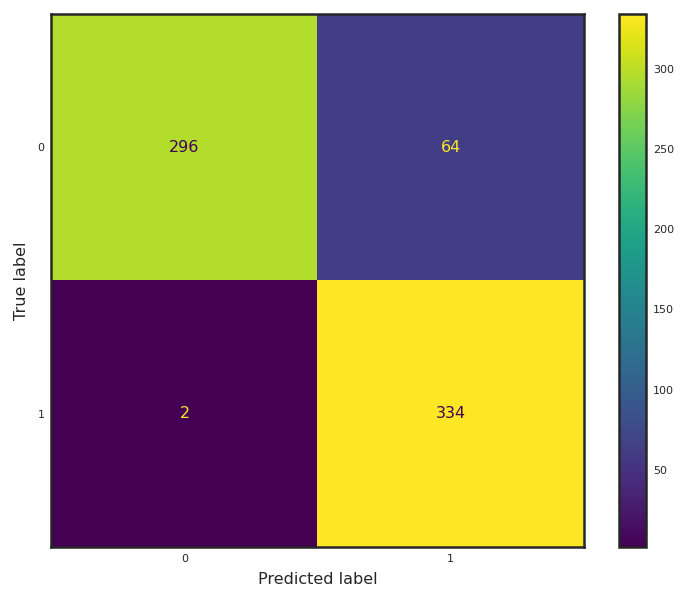

In [26]:
# Cria uma matriz com eixo de valores reais vs. previsões.
# Recebe como parâmetro o novo modelo e os dados de teste.
ConfusionMatrixDisplay.from_estimator(classificador_profundo, test.X, test.y)

# Selecionando melhores features

In [27]:
# Selecionas a variáveis que são mais impostantes/relacionadas com o modelos.
classificador_simples.feature_importances_

array([0.01803655, 0.1761304 , 0.0443429 , 0.00487037, 0.00359109,
       0.01008645, 0.00059353, 0.13396885, 0.13567256, 0.11551401,
       0.14654085, 0.0870228 , 0.11280503, 0.01082462])

In [28]:
# Imposta a biblioteca Pandas.
import pandas as pd

In [29]:
# Cria uma series com os valores do array gerada pelo método feature_importances_ usando como index as colunas da base de teste.
pd.Series(data=classificador_simples.feature_importances_, index=test.X.columns).sort_values()

diabetes                       0.000594
AVC                            0.003591
uso_medicamento_pressao        0.004870
hipertensao                    0.010086
fumante                        0.010825
sexo                           0.018037
cigarros_por_dia               0.044343
freq_cardiaca                  0.087023
glicemia                       0.112805
pressao_arterial_diastolica    0.115514
colesterol_total               0.133969
pressao_arterial_sistolica     0.135673
IMC                            0.146541
idade                          0.176130
dtype: float64

In [30]:
# Exclui a coluna diabetes do dataset.
test.X.drop('diabetes', axis=1, inplace=True)
test.X

,sexo,idade,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,fumante
5487,1,61,15,0.0,0,0,204.0,120.0,80.0,25.71,80.0,83.0,2
5489,0,50,0,0.0,0,1,236.0,152.0,92.0,24.47,120.0,67.0,0
2133,1,42,20,0.0,0,0,182.0,120.0,83.0,27.26,85.0,87.0,2
37,1,52,0,0.0,0,1,178.0,160.0,98.0,40.11,75.0,225.0,0
2063,1,42,0,0.0,0,0,258.0,110.0,69.0,26.25,60.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,1,62,0,0.0,0,1,208.0,144.0,80.0,31.42,75.0,66.0,0
5465,1,67,15,0.0,1,1,285.0,155.0,90.0,30.42,70.0,77.0,2
2509,0,57,0,0.0,0,1,382.0,133.0,77.0,24.27,75.0,81.0,0
6261,1,56,20,0.0,0,1,205.0,210.0,130.0,25.49,95.0,127.0,2


In [31]:
# Exclui a coluna diabetes do dataset.
train.X.drop('diabetes', axis=1, inplace=True)
train.X

,sexo,idade,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,fumante
4782,1,49,20,0.0,0,1,193.0,172.0,105.0,19.70,90.0,77.0,2
208,0,43,0,0.0,0,0,263.0,115.0,82.5,25.91,105.0,81.8,0
1373,1,42,20,0.0,0,0,231.0,123.0,87.0,21.48,75.0,44.0,2
6816,1,52,25,0.0,0,1,206.0,173.0,117.0,29.63,75.0,77.0,3
3357,1,45,20,0.0,0,0,200.0,113.0,75.5,21.51,88.0,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,43,20,0.0,0,0,184.0,127.5,81.0,28.31,108.0,75.0,2
5191,1,52,20,0.0,0,0,225.0,126.0,75.0,22.18,85.0,100.0,2
5226,0,60,0,0.0,0,1,334.0,132.0,94.0,25.38,80.0,98.0,0
5390,1,54,43,0.0,0,0,243.0,135.0,92.0,31.30,90.0,65.0,3


In [32]:
# Cria um modelo de classifiação de árvore de decisão.
classificador_simples = DecisionTreeClassifier()

In [33]:
# Utiliza o método fit() para treinar o modelo com os dados de traino, mas sem a variável diabetes.
classificador_simples.fit(train.X, train.y)

DecisionTreeClassifier()

In [34]:
# Calcula a acurácia do novo modelo.
classificador_simples.score(test.X, test.y)

0.9037356321839081

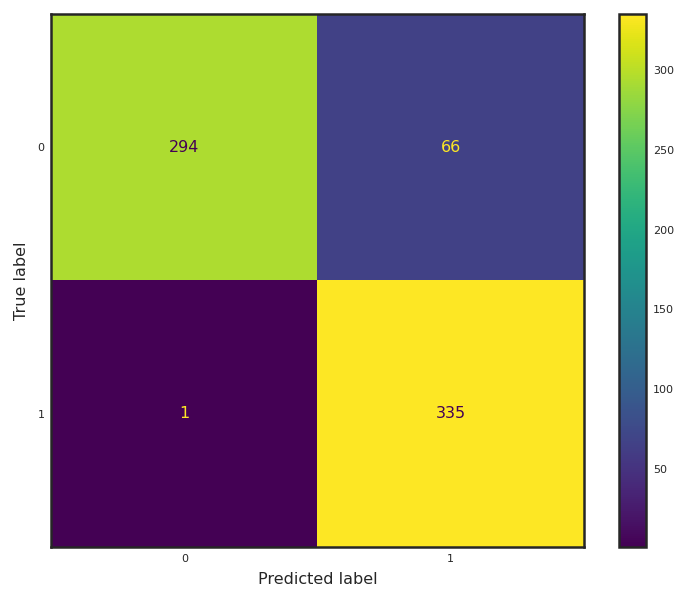

In [35]:
# Cria uma matriz com eixo de valores reais vs. previsões.
# Recebe como parâmetro o novo modelo e os dados de teste.
ConfusionMatrixDisplay.from_estimator(classificador_simples, test.X, test.y)